Info about datasets from different papers: how many units included/excluded from timescales analysis 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from isttc.scripts.cfg_global import project_folder_path

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
fig_folder = project_folder_path + 'results\\monkey\\fig_drafts_paper_reduce\\'

In [4]:
papers_l=['Cavanagh et al. 2016', 'Cavanagh et al. 2018', 'Cirillo et al. 2018', 'Fascianelli et al. 2019', 'Nougaret et al. 2021']
monkey_n_l=[4, 2, 2, 2, 2]
units_total_l=[857,694, 328, 1494, 328]
units_included_l=[446,358, 52, 978, 124]
units_included_perc=[52,52, 16, 65, 38]

dataset_df = pd.DataFrame(np.vstack((papers_l, monkey_n_l, units_total_l, units_included_l, units_included_perc)).T, 
                          columns=['paper', 'n_monkeys', 'n_units', 'n_included_units', 'perc'])
dataset_df['n_monkeys'] = dataset_df['n_monkeys'].astype(int)
dataset_df['n_included_units'] = dataset_df['n_included_units'].astype(int)
dataset_df['n_units'] = dataset_df['n_units'].astype(int)
dataset_df['included_perc'] = np.round(dataset_df['n_included_units'] / dataset_df['n_units'] * 100,2)
dataset_df['n_excluded_units'] = dataset_df['n_units'] - dataset_df['n_included_units']
dataset_df

,paper,n_monkeys,n_units,n_included_units,perc,included_perc,n_excluded_units
0,Cavanagh et al. 2016,4,857,446,52,52.04,411
1,Cavanagh et al. 2018,2,694,358,52,51.59,336
2,Cirillo et al. 2018,2,328,52,16,15.85,276
3,Fascianelli et al. 2019,2,1494,978,65,65.46,516
4,Nougaret et al. 2021,2,328,124,38,37.80,204


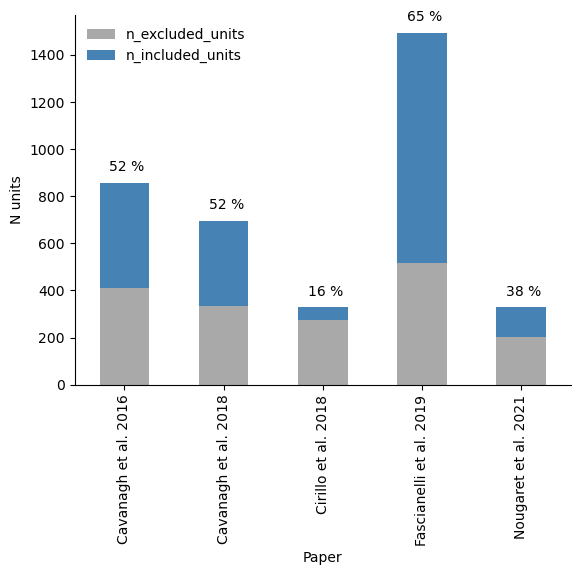

In [5]:
fig, axes = plt.subplots()

colors = ['darkgrey', 'steelblue']
dataset_df.set_index('paper').plot(ax=axes, kind='bar', y=['n_excluded_units', 'n_included_units'], stacked=True, color=colors)

axes.set_xlabel('Paper')
axes.set_ylabel('N units')

axes.legend(frameon=False)

x_offset = -0.15
y_offset = 50
i=0
for p in axes.patches:
    if i > 4:
        b = p.get_bbox()
        val = dataset_df.iloc[i-5]['perc'] + ' %'
        axes.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    i=i+1
    
sns.despine()

fig.savefig(fig_folder + 'papers_datasets.png', bbox_inches='tight')
fig.savefig(fig_folder + 'papers_datasets.svg', bbox_inches='tight')